In [51]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [52]:
train = pd.read_csv("./train_max.csv")
test = pd.read_csv("./test_max.csv")
train_id = train["train_id"]
target = train["dbh"]
train = train.drop(["dbh"],axis=1)
test_id = test["test_id"]
print(train.describe())

       train_id      max_h
count   80.0000  80.000000
mean    60.5000  28.781000
std     23.2379   4.690542
min     21.0000  21.010000
25%     40.7500  24.650000
50%     60.5000  27.940000
75%     80.2500  33.025001
max    100.0000  36.820000


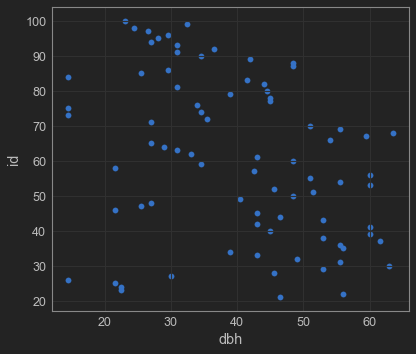

In [53]:
import matplotlib.pyplot as plt
x = target
y = train_id
plt.scatter(x,y)
plt.xlabel("dbh")
plt.ylabel("id")
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean

kf = KFold(n_splits=50,random_state=0)
rmse = []
pred = []

for X_index, Y_index in kf.split(train):
    X_train, X_valid = train.loc[X_index], target.loc[X_index]
    Y_train, Y_valid = train.loc[Y_index], target.loc[Y_index]
    regr = LinearRegression(normalize=False)
    regr.fit(X_train,X_valid)
    predict = regr.predict(Y_train)
    rmse.append(np.sqrt(mean_squared_error(predict,Y_valid)))
    pred.append(regr.predict(test))
    
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数
print("RMSE: ", mean(rmse))
predict = np.mean(pred,axis=0)
print(predict)

Intercept: -8.12136189946353
Coefficients:  [0.11360416 1.43793426]
RMSE:  10.759800362864167
[32.84777469 32.16372463 32.19630915 31.89085633 31.80174813 31.48277363
 31.56944235 30.12819522 30.10669292 30.12575315 30.07721003 29.54189351
 29.58799713 29.40423962 28.84188228 28.80685828 28.75831259 25.36998341
 25.25383181 25.02950919 24.03446652 22.60673981 22.63932302 22.57725562
 16.02492246]


C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


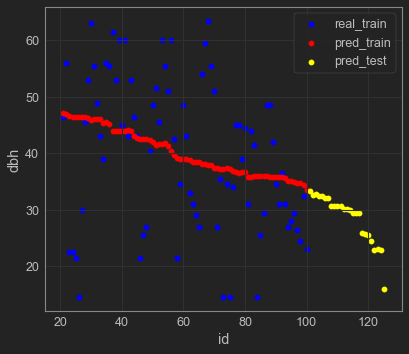

In [61]:
plt.scatter(train_id,target,color="blue",label="real_train")
plt.scatter(train_id,regr.predict(train),color="red",label="pred_train")
plt.scatter(test_id,regr.predict(test),color="yellow",label="pred_test")
plt.ylabel("dbh")
plt.xlabel("id")
plt.legend(loc="upper right")
plt.show()

In [62]:
pred = pd.DataFrame()
pred["Id"] = test_id
pred["dbh"] = predict.round(2)
pred.to_csv("crazy.csv", index=False)